<a href="https://colab.research.google.com/github/julianepping/projekt-stud/blob/main/%C3%9Cbungsaufgabe%20Klassische%20KI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV 🏞





> Was ist OpenCV❓❔

- OpenCV ist eine freie Programmbibliothek für Computer Vision
    - Apache 2 License

- Entwickelt für die Programmiersprachen C/C++/Python/Java

- OpenCV verwendet numpy als Grundlage für das Erstellen von Modellen
    - kann somit auch mit großen Datenmengen rechnen



---

> Grundlagen für Bilder🌄

- Ein Bild = ein mehrdimensionales Array von Bildpunkten
- Jeder Bildpunkt kann dabei den Wert 0-255 annehmen

- Ein farbiges Bild speichert zu jedem Bildpunkt 3 Farbwerte (RGB) 
    - In Open CV ist die Reihenfolge Umgedreht (BGR)

- 255, 0 ,0 = Blau 
- 0, 255, 0 = Grün 
- 0, 0, 255 = Rot




> Installieren von OpenCV



In [4]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




> Importieren der benötigten Programmbibliotheken



In [5]:
#Grafiken werden in der Ausgabe angezeigt durch:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np



> Bilddarstellung in OpenCV



In [8]:
# Einlesen eines Bildes
img = cv2.imread("bild.jpg")
#Pixel des Bildes
img.shape

(1000, 1500, 3)

[209 183 171]


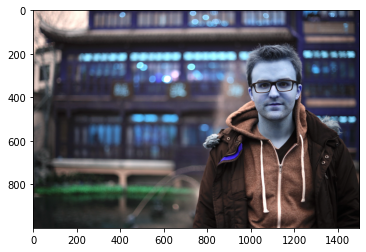

In [9]:
#Ausgeben eines Pixels
print(img[0][0])
#BGR zu RGB kovertieren, da OpenCV speichert die Bildwerte nach BGR

#i = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()



> Bildverarbeitung in OpenCV



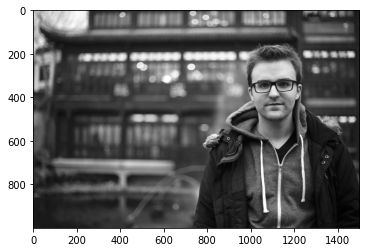

In [10]:
#Bild in Schwarz/Weiß darstellen
#in Schwarz Weiß konvertieren
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(g, "gray")
plt.show()

In [11]:
#Helligkeit erhöhen mit einfacher Addition
#uint8 -> Zahlen von 0-255 // 8 bit
r = np.array([1, 2, 3, 100], dtype="uint8")
print(r)
r = r + 250
print(r)

[  1   2   3 100]
[251 252 253  94]


[209 183 171]
[  3 233 221]


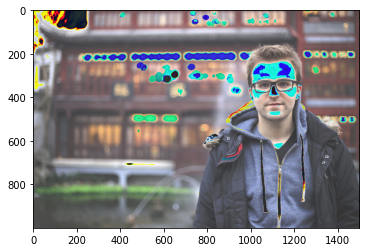

In [12]:
#Am Beispiel des Bildes
#rechnet einfach hoch erzeugt unpassende Werte

increased = img + 50
print(img[0][0])
print(increased[0][0])

j = cv2.cvtColor(increased, cv2.COLOR_BGR2RGB)
plt.imshow(j)
plt.show()

In [13]:
#Helligkeit eines Bildes ohne Bildfehler erhöhen
#add Funktion
# Erstellen eines Arrays im selben Shape
z = np.zeros((1000, 1500, 3), dtype="uint8") + 50
print(z)

[[[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 ...

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]]


In [14]:
# Helligkeit des Bildes erhöhen
increased = cv2.add(img, z)
print(img[0][0])
print(z[0][0])
print(increased[0][0])

[209 183 171]
[50 50 50]
[255 233 221]


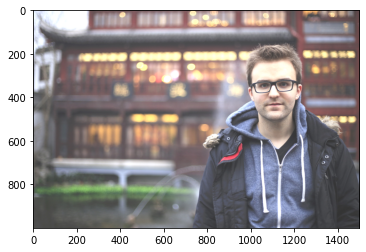

In [15]:
# Plotten des helleren Bildes
k = cv2.cvtColor(increased, cv2.COLOR_BGR2RGB)
plt.imshow(k)
plt.show()

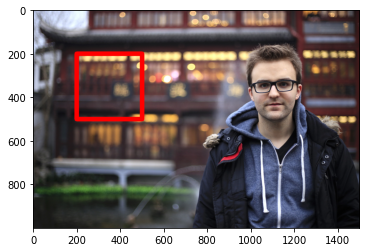

In [17]:
#Rechtecke in einem Bild erstellen
i = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.rectangle(img, (200, 200), (500, 500), (0, 0, 255) , 20)
plt.imshow(i)
plt.show()



> Gesichtserkennung



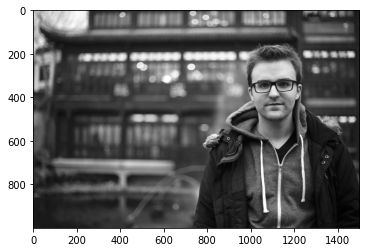

In [18]:
img = cv2.imread("bild.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, "gray")
plt.show()

In [19]:
#Laden eines classifiers = diese Daten müssen trainiert werden.
#Classifier sind trainiert.
#Algorithmus wurde mit Testbildern gefüttert.
#Datensatz von 10000 Bilder von Geischtern 

#Wir laden lediglich den Classifier.

classifier = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")

# mehrere Gsichter in einem Bild werden erkannt und egal wie groß der Kopf ist
# näher zu erläutern
faces = classifier.detectMultiScale(gray, minNeighbors =10)

print(faces)

[[976 241 262 262]]


[976 241 262 262]


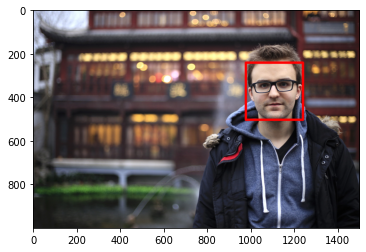

In [20]:
c = img.copy()
#Rechteck Zeichnen um das Gesicht einzugrenzen

for face in faces:
    x, y, w, h =face
    cv2.rectangle(c, (x, y), (x + w, y + h), (0,0,255), 10)
    
    print(face)

i = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
plt.imshow(i)
plt.show()


# man kann ein mask definieren wie sicher ist sich der Computer das sich dort ein GEsicht befindet